# Actividad de consolidación modulo 5

## 1. Diseño del experimento

### Explica brevemente cómo se podría mejorar el diseño del experimento para reducir posibles sesgos.

Para reducir los sesgos del experimento se puede implementar una o varias de siguientes mejoras:

1.- Generar los grupos de estudio aleatoriamente, para evitar que factores externos como la motivacion y antecedentes académicos influyan en los resultados.

2.- Aumentar el total de la muestra para obtener resultados estadisticos más representativos

3.- Asegurar que los grupos tengan caracteristicas similares

## 2.- Cálculo de estadísiticas descriptivas

### Calcula la media y la desviación estándar para ambos grupos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

grupo_a = np.array([85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88])
grupo_b = np.array([70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80])

media_a, std_a = np.mean(grupo_a), np.std(grupo_a, ddof=1)
media_b, std_b = np.mean(grupo_b), np.std(grupo_b, ddof=1)

print(f'Grupo A, media: {media_a:.2f} y desviación estándar: {std_a:.2f}')
print(f'Grupo b, media: {media_b:.2f} y desviación estándar: {std_b:.2f}')

Grupo A, media: 85.87 y desviación estándar: 4.02
Grupo b, media: 75.07 y desviación estándar: 3.71


### Representa los datos gráficamente

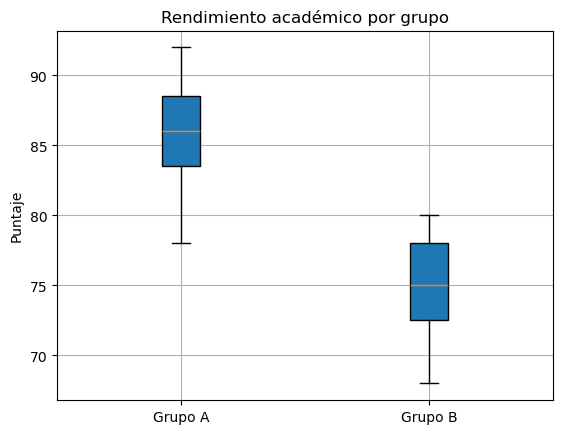

In [8]:
plt.boxplot([grupo_a, grupo_b], labels=['Grupo A', 'Grupo B'], patch_artist = True)
plt.title('Rendimiento académico por grupo')
plt.ylabel('Puntaje')
plt.grid()
plt.show()

## 3. Prueba de hipótesis

### Plantea la hipótesis nula (H0) y alternativa (H1)

H0: No hay diferencia en el rendimiento académico entre los dos grupos.

H1: El grupo con tutoría tiene un mejor rendimiento académico.

### Realiza una prueba t para comparar los medias de ambos grupos. Usa un nivel de significancia ($\alpha$ = 0.05)

In [10]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(grupo_a, grupo_b)
print(f'Prueba de hipotesis: {t_stat:.2f}')
print(f'Valor p: {p_value:.8f}')

Prueba de hipotesis: 7.65
Valor p: 0.00000002


### Interpretrar el valor-p y decidir si se rechaza o no la hipótesis nula

In [11]:
if p_value < 0.05:
  print(f'Como el valor de p es menor a 0.05, rechazamos la hipotesis nula H0')
else:
  print(f'Como el valor de p es mayor a 0.05, aceptamos la hipotesis nula H0')

Como el valor de p es menor a 0.05, rechazamos la hipotesis nula H0


Por lo tanto, la mejoria que se aprecia en el grafico de caja del grupo A tiene significancia estadistica.

## 4. Invervalo de confianza

### Calcula un intervalo de confianza del 95% para la diferencia de medias entre los dos grupos

In [19]:
import scipy.stats as st

lvl_conf = 0.95

diff_medias = media_a - media_b

error_std_diff = np.sqrt((std_a ** 2 / len(grupo_a)) + (std_b ** 2 / len(grupo_b)))

dof = len(grupo_a) + len(grupo_b) - 2

inter_conf = st.t.interval(lvl_conf, dof, loc = diff_medias, scale = error_std_diff)
print(f'Con un intervalo de confianza de {lvl_conf * 100:.0f}% la diferencia entre las medias oscila entre {inter_conf}')

Con un intervalo de confianza de 95% la diferencia entre las medias oscila entre (7.907716724419259, 13.692283275580735)


### Interpreta el resultado

Con una seguridad del 95% se puede asegurar que el programa de tutoría aumento el rendimiento académico del grupo entre 7 y 13 puntos respecto al grupo sin tutoria.